#Introduction to Android app components

---


App components are the essential building blocks of an Android app. These components are loosely coupled by the application manifest file AndroidManifest.xml that describes each component of the application and how they interact.

Each component is an entry point through which the system or a user can enter your app. Some components depend on others.

There are four different types of app components:

* Activities
* Services
* Broadcast receivers
* Content providers

Each type serves a distinct purpose and has a distinct lifecycle that defines how the component is created and destroyed.

Here we will discuss in more detail about **Broadcast receivers**.

# Agenda

---



* Understand, what is a Broadcast & Broadcast Receiver?
* Type of Broadcast (app & system)
* Ways to declare a Broadcast Receivers.
* Long running task, inside a broadcast.

# Broadcast and Broadcast Receiver:

---




A **Broadcast** is a messaging system across the application and outside of the normal user flow. The app can send or receive messages, known as **broadcast messages** from the android system and other android apps.

Broadcasts are sent only when an event of interest occurs. But apps can also send custom broadcast messages. For example, to notify other apps of something that they might be interested in (for example, some new data has been downloaded).

**System Broadcast:** The Android system automatically sends broadcasts when various system events occur, such as when the system switches in and out of airplane mode. The system sends these broadcasts to all apps that are subscribed to receive the event.

**Example of System Broadcasts events:**

Here are some examples that are very much related to our daily lives with android.
* Airplane mode changed
* SMS Received
* Power connected
* Phone call
* Battery low


**Broadcast Receivers:** They handle communication between Android OS and applications.

Broadcast Receivers simply respond to broadcast messages from other applications or from the system. 

For example, applications can also initiate broadcasts to let other applications know that some data has been downloaded to the device and is available for them to use, so this is broadcast receiver who will intercept this communication and will initiate appropriate action.

### **Handling System Broadcast Messages:**
 ---



The broadcast message itself is wrapped in an <a href="https://developer.android.com/reference/android/content/Intent">Intent</a>. There is an **Action String**, which defines the type of broadcast which occurred.(For example, `android.intent.action.AIRPLANE_MODE`). The intent may also include additional information bundled into its extra field.

For example, the airplane mode intent includes a boolean extra that indicates whether or not **Airplane Mode is on.**

# Types of Broadcast Receiver:

---



Broadcasts receivers are classified here based on the Broadcast Receiver Declaration.
To receive a broadcast message, we need to create a broadcast receiver and we need to declare it.
We have two options two declare a broadcast receiver.

1. <a href="https://developer.android.com/guide/components/broadcasts#manifest-declared-receivers">Manifest Declared</a>:
By declaring one in your AndroidManifest.xml file with the <receiver> tag (also called static)


In [ ]:
<receiver android:name=".YourBrodcastReceiverClass"  android:exported="true">
    <intent-filter>
        <!-- The actions you wish to listen to, below is an example -->
        <action android:name="android.intent.action.BOOT_COMPLETED"/>
    </intent-filter>
</receiver>

 2.  <a href="https://developer.android.com/guide/components/broadcasts#context-registered-receivers">Context Declared</a>

To register a receiver with a context, perform the following steps:






1.  Create an instance of `BroadcastReceiver.`

  `BroadcastReceiver br = new MyBroadcastReceiver();`

2. Create an IntentFilter and register the receiver by calling registerReceiver(BroadcastReceiver, IntentFilter):


  ```
  IntentFilter filter = new IntentFilter(ConnectivityManager.CONNECTIVITY_ACTION);
    filter.addAction(Intent.ACTION_AIRPLANE_MODE_CHANGED);
     this.registerReceiver(br, filter);
  ```





# How do we implement a Broadcast Receiver?






## 1. Manifest declared Broadcast Receiver 

---



Step 1: Inside android studio create a new application with an empty activity.

Step 2: Follow the note and see if the project is fulfilling this requirement or not.




**It is important to note that,
If our targets API level 26 or higher, we cannot use the manifest to declare a receiver for <a href="https://www.journaldev.com/23653/android-oreo-implicit-and-explicit-broadcast-receiver">implicit broadcasts</a>, except for a few implicit broadcasts that are <a href="https://developer.android.com/guide/components/broadcast-exceptions">exempted from that restriction.</a>** 





If the above <a href="https://stackoverflow.com/questions/19465049/changing-api-level-android-studio">condition is satisfied</a>, then you can proceed.

Step 3: Follow the path

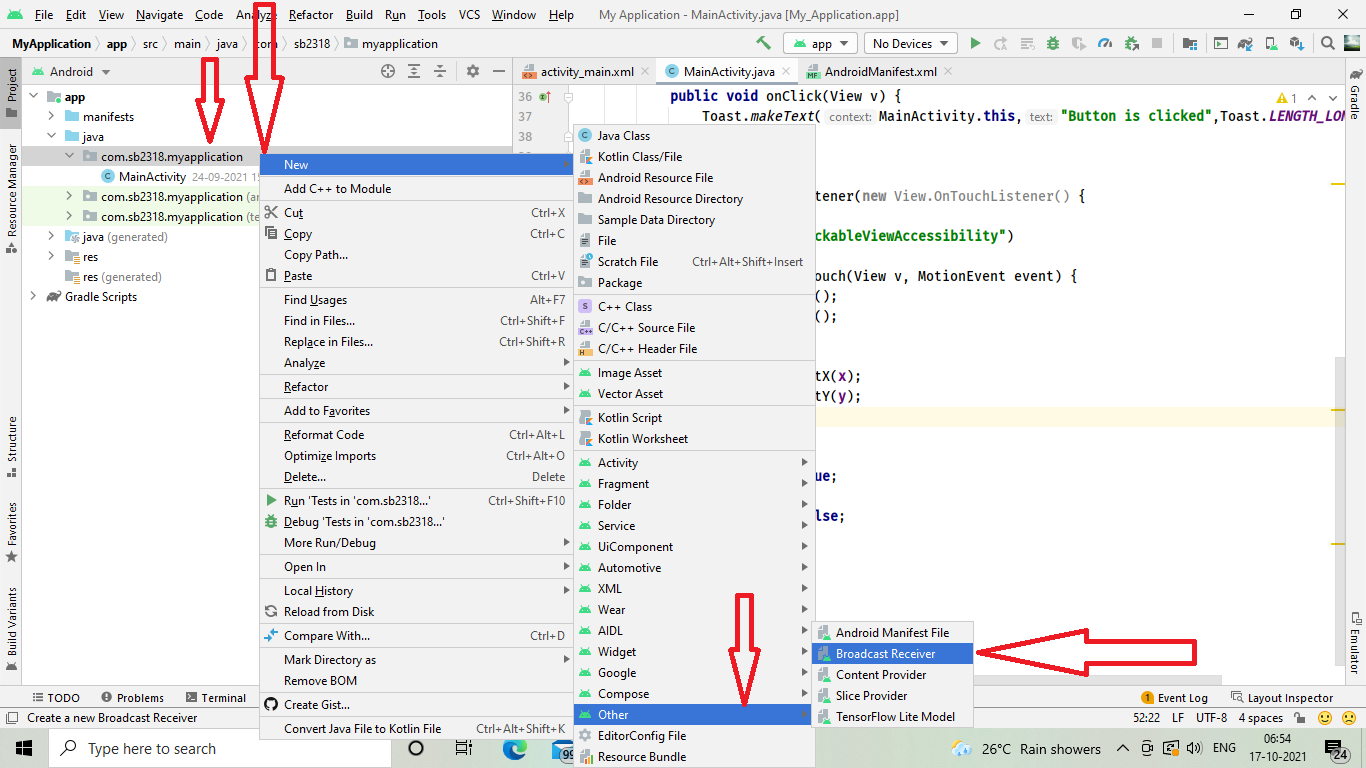

---
Keep these two checkboxes true when you create a new broadcast receiver.






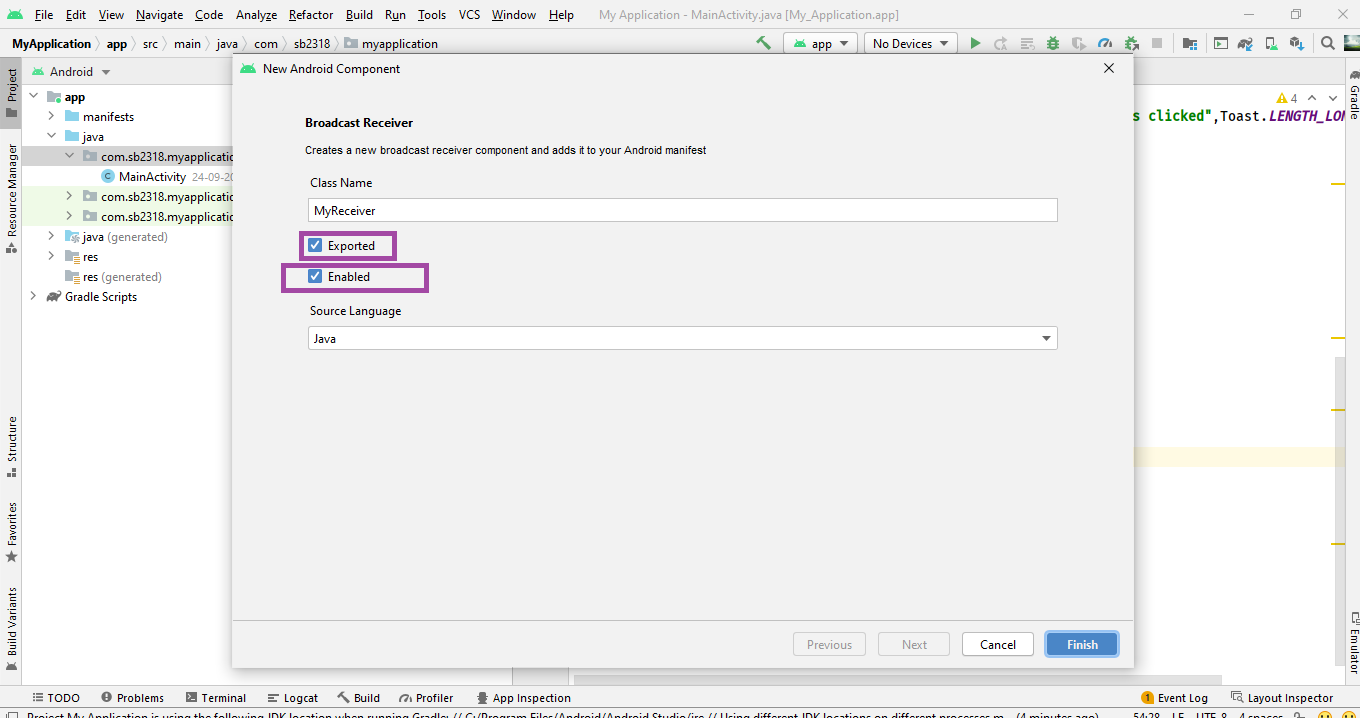



---
**Exported:** Whether the broadcast receiver can receive messages from non-system sources outside its application.

**Enabled:** Declares a broadcast receiver (a BroadcastReceiver subclass) as one of the application's components. 

For further details,<a href="https://developer.android.com/guide/topics/manifest/receiver-element">click here </a> 



Now, If we go to the manifest file, you will see our receiver will already register in the manifest.

---



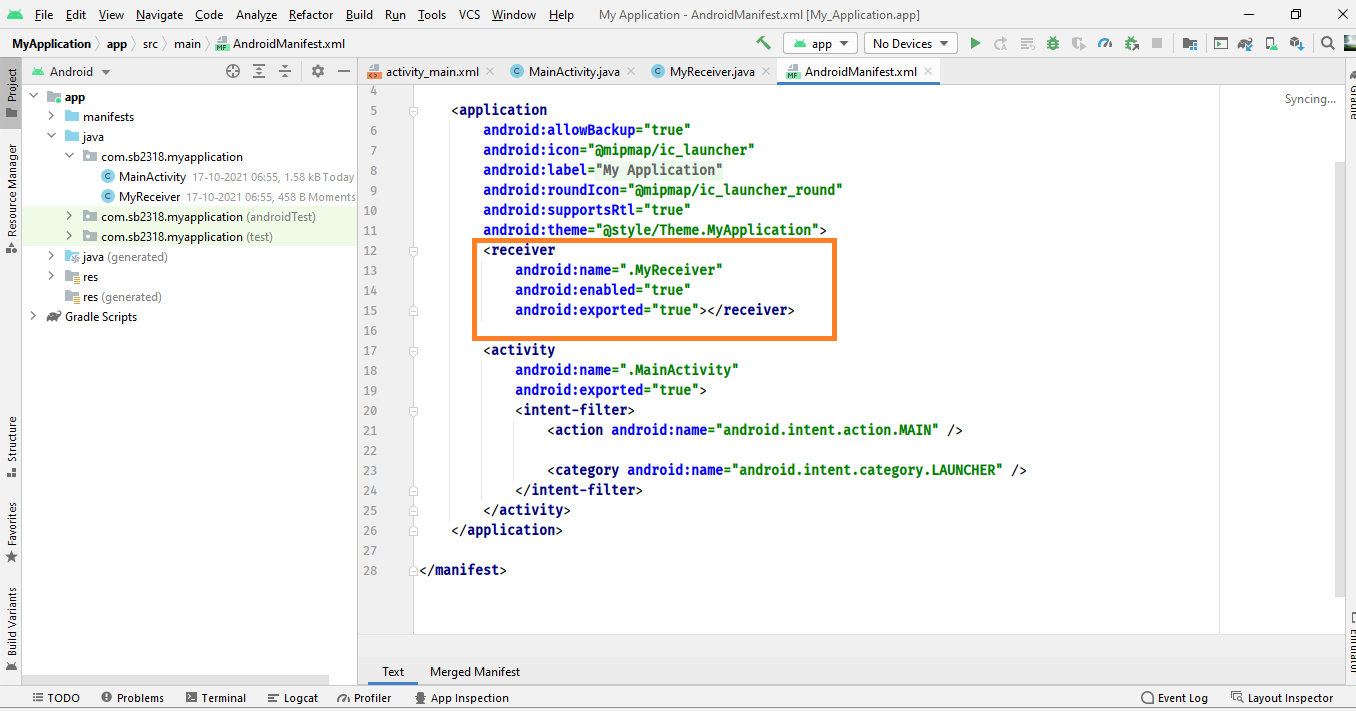

---
Now let's take a look at **MyReceiver.java**

---



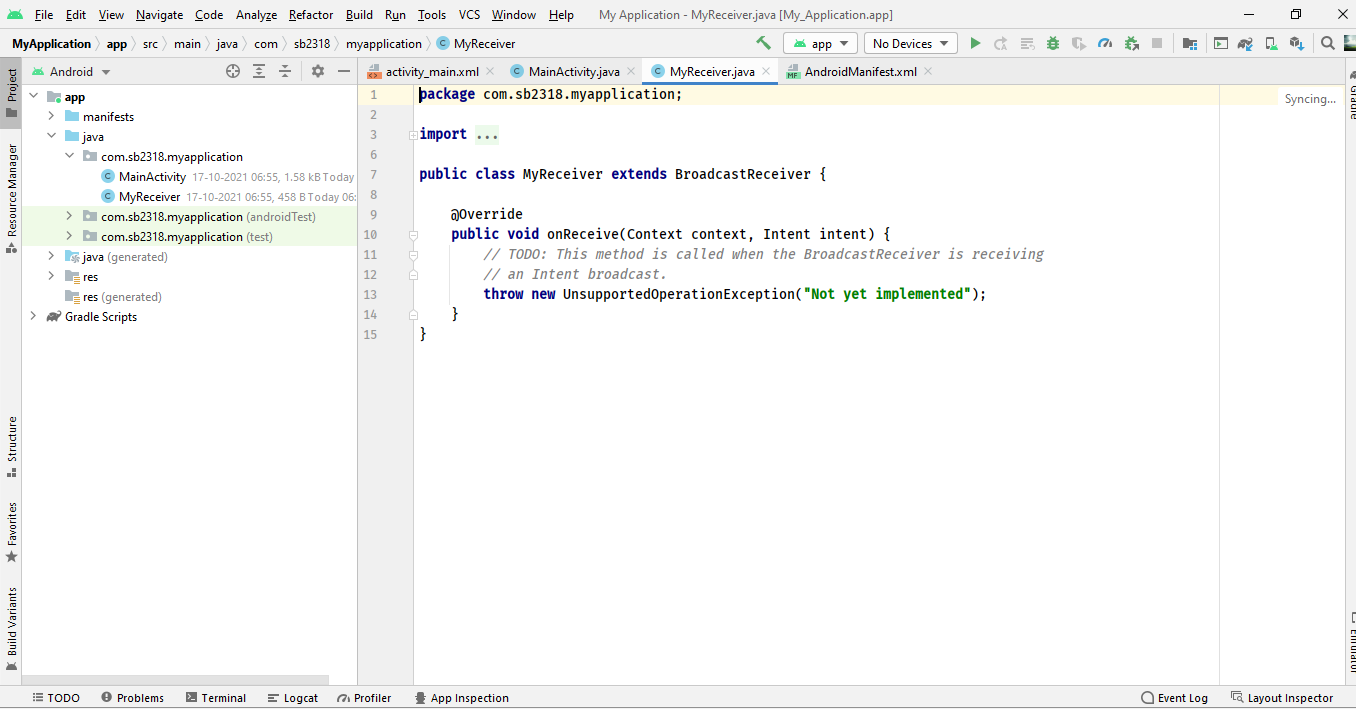

Here we see that our receiver class extends a predefined abstract class called <a href="https://developer.android.com/reference/android/content/BroadcastReceiver">BroadcastReceiver</a>.

```
public abstract class BroadcastReceiver extends Object
```
Inside this class, we have a method named <a href="https://developer.android.com/reference/android/content/BroadcastReceiver#onReceive(android.content.Context,%20android.content.Intent)">onReceive()</a>.
Whenever the event for which the receiver is registered occurs, this method is called. For instance, in case of battery low notification, the receiver is registered to Intent. ACTION_BATTERY_LOW event. As soon as the battery level falls below the defined level, this onReceive() method is called.

Now let's move towards our goal.

Step 4: Go to the manifest file. Here inside the registered receiver, here we need to define our <a href="https://developer.android.com/guide/topics/manifest/intent-filter-element">intent filter</a>, that is what broadcast intent is required to trigger this receiver.

Now,  naturally, a question arises here **what are we going to do?** We will create a broadcast receiver that will be triggered, whenever the device's timezone is changed. So we need to pass the intent filter named, <a href="https://developer.android.com/reference/android/content/Intent#ACTION_TIMEZONE_CHANGED">`ACTION_TIMEZONE_CHANGED`</a> to our broadcast receiver.

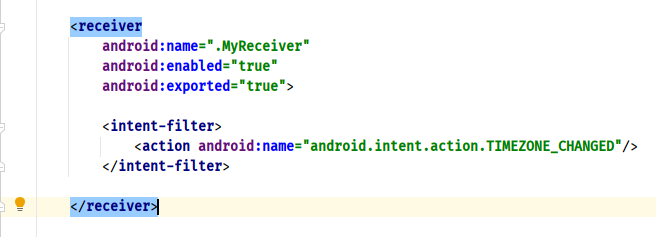

Step 5: Let us go back to the receiver class.

Here we make a toast containing the action string of the intent.

It is important to note that `ACTION_TIMEZONE_CHANGED `contains an extra string value, named `time-zone` specify the new time zone of the device. We also want to display this new time zone in the toast.

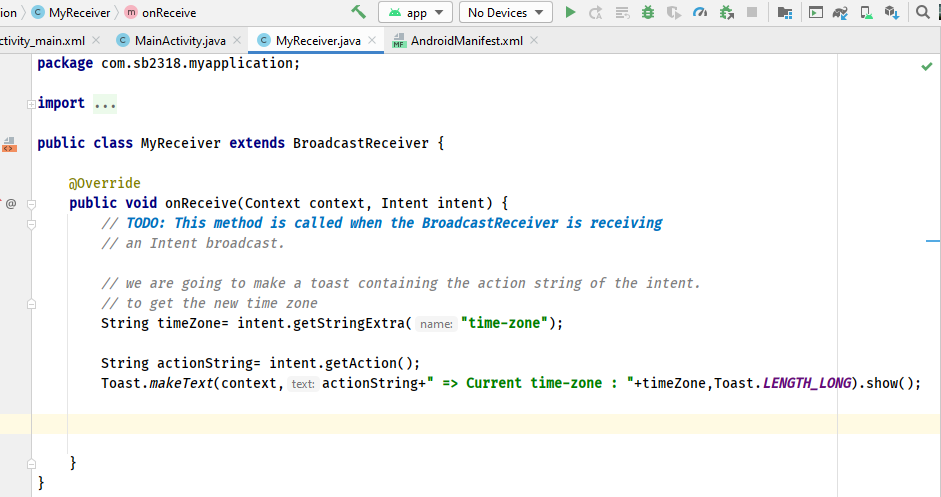



---
Now let us run our application. After launching the application, go to settings and changed the time zone.

---









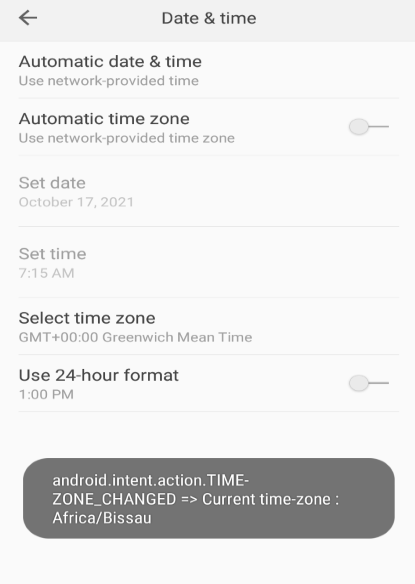



---



## 2.  Context declared Broadcast Receiver:

---



Here we will use the same broadcast receiver. Whenever the airplane mode is changed, we are going to trigger this broadcast receiver.

Step 1: Go to the MainActivity and Initialize the broadcast receiver.

Step 2: Override the <a href="https://developer.android.com/guide/components/activities/activity-lifecycle#onstart">onStart()</a> and <a href="https://developer.android.com/guide/components/activities/activity-lifecycle#onstop">onStop()</a> method.

Whenever you want to register your broadcast receiver using context declared broadcast, you should always register your receiver and unregister your receiver.

If you don't unregister your receiver, then multiple times this broadcast receiver would be registered and you will get multiple events.

Here we will use the `onStart()` method to register the broadcast receiver and the `onStop()` method to unregister a broadcast receiver.

Step 3: Register the broadcast receiver.

Step 4: Unregister the broadcast receiver.


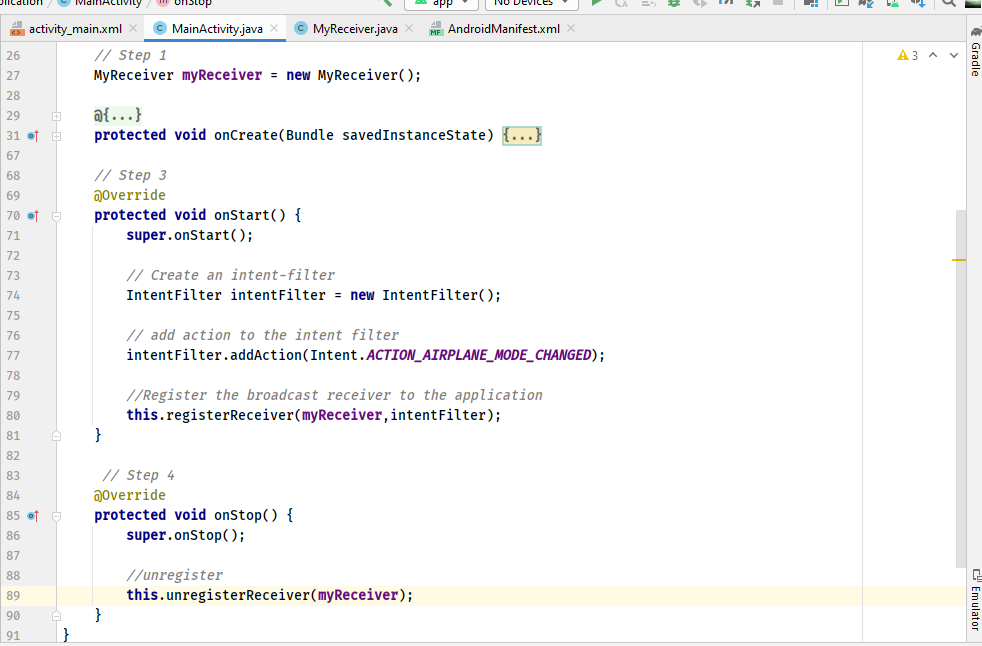



---
We have just added action, but how do we know if our application has changed at all? For the task, we will set an action in the receiver class. We will show a toast with the help of `state` value.






`ACTION_AIRPLANE_MODE_CHANGED`:

Broadcast Action: The user has switched the phone into or out of Airplane Mode. One or more radios have been turned off or on. The intent will have the following extra value:

state - A boolean value indicating whether Airplane Mode is on. If true, then cell radio and possibly other radios such as bluetooth or WiFi may have also been turned off.

Step 5: Go to MyReceiver class.

Step 6: Get the extra boolean value attached with that intent inside the `onReceive()` method.

Step 7: Show the toast information.

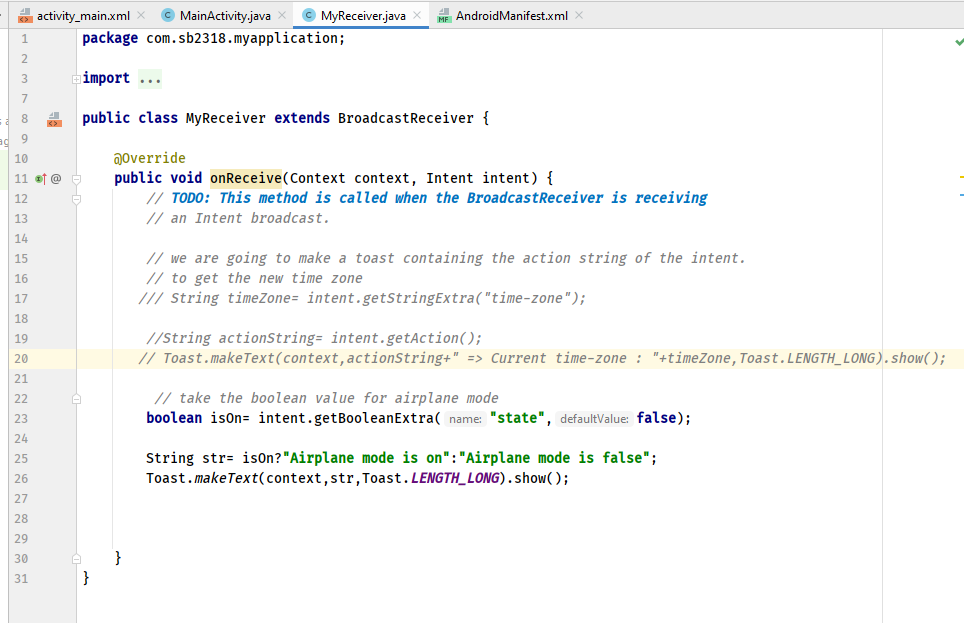



---
Run your application and see the result.


---





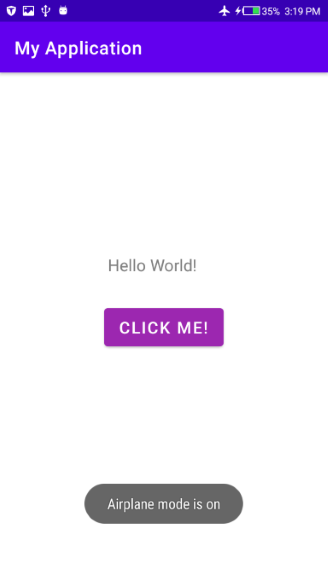

# Limitation of onReceive() method:

---



Currently, the onReceive() method gives us only 16 milliseconds to do our work. But if our work is long, then our work might be pending.

To get rid of this problem you can use <a href="https://developer.android.com/reference/android/os/AsyncTask">AsyncTask</a> with the pending result.

If you are interested in the use of AsyncTask, how we can perform the long-running task with Broadcast Receiver, <a href="https://stackoverflow.com/questions/21743800/call-asynctask-from-broadcast-receiver-android/21744022">click here.</a>